In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Strategic_Subject_List.csv")

/Users/nico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['SSL SCORE', 'PREDICTOR RAT AGE AT LATEST ARREST',
       'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
       'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
       'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
       'PREDICTOR RAT GANG AFFILIATION', 'PREDICTOR RAT NARCOTIC ARRESTS',
       'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY', 'PREDICTOR RAT UUW ARRESTS',
       'SEX CODE CD', 'RACE CODE CD', 'WEAPON I', 'DRUG I', 'AGE GROUP',
       'AGE TO', 'STOP ORDER NO', 'PAROLEE I', 'LATEST DATE', 'LATEST DIST',
       'MAJORITY DIST', 'DLST', 'LATEST DIST RES', 'WEAPONS ARR CNT',
       'LATEST WEAPON ARR DATE', 'NARCOTICS ARR CNT',
       'LATEST NARCOTIC ARR DATE', 'IDOC RES CITY', 'IDOC RES STATE CODE',
       'IDOC RES ZIP CODE', 'IDOC CPD DIST', 'CPD ARREST I',
       'DOMESTIC ARR CNT', 'LATEST DOMESTIC ARR DATE', 'AGE CURR',
       'SSL LAST PTV DATE', 'TRAP STATUS', 'RAW SSL SCORE', 'HEAT SCORE',
       'RAW_HEAT_SCORE', 'STATUS I', 'PRE RAW HEAT SCORE', 'TRAP FLAGS',
       'SSL FL

In [4]:
%matplotlib inline

In [5]:
df.groupby("RACE CODE CD").size().sort_values(ascending=False)

RACE CODE CD
BLK    207842
WWH     99710
WHI     82366
API      4617
WBH      1974
U        1899
I         276
dtype: int64

In [6]:
df.iloc[0]

SSL SCORE                                       500
PREDICTOR RAT AGE AT LATEST ARREST            20-30
PREDICTOR RAT VICTIM SHOOTING INCIDENTS           0
PREDICTOR RAT VICTIM BATTERY OR ASSAULT           1
PREDICTOR RAT ARRESTS VIOLENT OFFENSES            4
PREDICTOR RAT GANG AFFILIATION                    1
PREDICTOR RAT NARCOTIC ARRESTS                    1
PREDICTOR RAT TREND IN CRIMINAL ACTIVITY          1
PREDICTOR RAT UUW ARRESTS                         1
SEX CODE CD                                       M
RACE CODE CD                                    BLK
WEAPON I                                          Y
DRUG I                                            N
AGE GROUP                                     20-30
AGE TO                                        20-30
STOP ORDER NO                                   NaN
PAROLEE I                                       NaN
LATEST DATE                                    2015
LATEST DIST                                      31
MAJORITY DIS

In [7]:
def plot_groupby(column):
    print(df.groupby(column).size().plot(kind="bar"))

AxesSubplot(0.125,0.125;0.775x0.755)


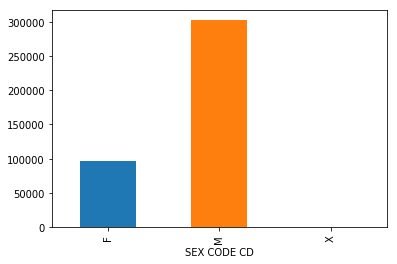

In [8]:
plot_groupby("SEX CODE CD")

AxesSubplot(0.125,0.125;0.775x0.755)


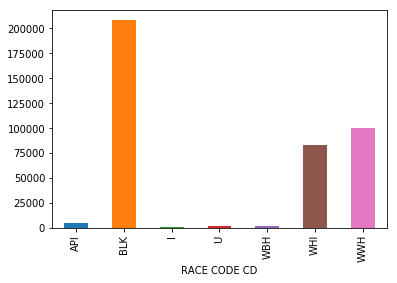

In [9]:
plot_groupby("RACE CODE CD")

AxesSubplot(0.125,0.125;0.775x0.755)


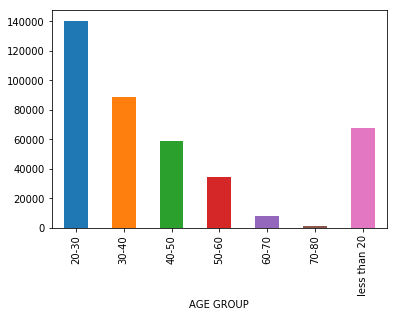

In [10]:
plot_groupby("AGE GROUP")

In [11]:
len(df.dropna(thresh=27))

297591

In [13]:
df = df.dropna(thresh=27)

AxesSubplot(0.125,0.125;0.775x0.755)


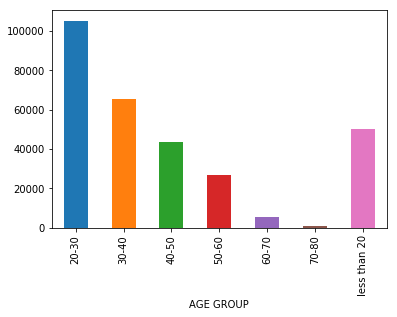

In [19]:
plot_groupby(df["AGE GROUP"])

In [98]:
from sklearn.linear_model import LinearRegression

In [20]:
import statsmodels.formula.api as sm

In [25]:
list(df.columns)[1:]

['PREDICTOR RAT AGE AT LATEST ARREST',
 'PREDICTOR RAT VICTIM SHOOTING INCIDENTS',
 'PREDICTOR RAT VICTIM BATTERY OR ASSAULT',
 'PREDICTOR RAT ARRESTS VIOLENT OFFENSES',
 'PREDICTOR RAT GANG AFFILIATION',
 'PREDICTOR RAT NARCOTIC ARRESTS',
 'PREDICTOR RAT TREND IN CRIMINAL ACTIVITY',
 'PREDICTOR RAT UUW ARRESTS',
 'SEX CODE CD',
 'RACE CODE CD',
 'WEAPON I',
 'DRUG I',
 'AGE GROUP',
 'AGE TO',
 'STOP ORDER NO',
 'PAROLEE I',
 'LATEST DATE',
 'LATEST DIST',
 'MAJORITY DIST',
 'DLST',
 'LATEST DIST RES',
 'WEAPONS ARR CNT',
 'LATEST WEAPON ARR DATE',
 'NARCOTICS ARR CNT',
 'LATEST NARCOTIC ARR DATE',
 'IDOC RES CITY',
 'IDOC RES STATE CODE',
 'IDOC RES ZIP CODE',
 'IDOC CPD DIST',
 'CPD ARREST I',
 'DOMESTIC ARR CNT',
 'LATEST DOMESTIC ARR DATE',
 'AGE CURR',
 'SSL LAST PTV DATE',
 'TRAP STATUS',
 'RAW SSL SCORE',
 'HEAT SCORE',
 'RAW_HEAT_SCORE',
 'STATUS I',
 'PRE RAW HEAT SCORE',
 'TRAP FLAGS',
 'SSL FLAGS',
 'LATITUDE',
 'LONGITUDE',
 'CENSUS TRACT',
 'COMMUNITY AREA',
 'LOCATION']

In [30]:
for elt in [elt for elt in list(df.columns)[1:]

In [41]:
df.columns = [elt.replace(" ", "_") for elt in list(df.columns)]

In [93]:
formula = ""
for elt in list(df.columns)[1:20]:
    formula += elt + " + "
formula = "SSL_SCORE ~ " + formula
formula = formula[:-3]

In [94]:
formula

'SSL_SCORE ~ PREDICTOR_RAT_AGE_AT_LATEST_ARREST + PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS + SEX_CODE_CD + RACE_CODE_CD + WEAPON_I + DRUG_I + AGE_GROUP + AGE_TO + STOP_ORDER_NO + PAROLEE_I + LATEST_DATE + LATEST_DIST + MAJORITY_DIST'

In [95]:
result = sm.ols(formula=formula, data=df).fit()

In [96]:
result.summary()

/Users/nico/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/nico/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/nico/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/nico/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SSL_SCORE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           2.19e-62
Time:                        10:28:10   Log-Likelihood:                -484.82
No. Observations:                 128   AIC:                             1020.
Df Residuals:                     103   BIC:                             1091.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                          -1.758e+04   2.69e+04     -0.655      0.514   -7.08e+04    3.57e+04
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.30-40]           -0.0045     16.040     -0.000      1.000     -31.816      31.807
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.40-50]          -24.4892      1.263    -19.386      0.000     -26.995     -21.984
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.50-60]          -45.0248      2.691    -16.734      0.000     -50.361     -39.688
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.60-70]        -8.725e-05      0.000     -0.655      0.514      -0.000       0.000
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.70-80]         8.966e-05      0.000      0.655      0.514      -0.000       0.000
PREDICTOR_RAT_AGE_AT_LATEST_ARREST[T.less than 20]    23.8795     14.177      1.684      0.095      -4.236      51.995
SEX_CODE_CD[T.M]                                      16.0655      6.686      2.403      0.018       2.805      29.326
SEX_CODE_CD[T.X]                                      34.3601     14.365      2.392      0.019       5.870      62.850
RACE_CODE_CD[T.BLK]                                -4391.1689   6713.887     -0.654      0.515   -1.77e+04    8924.243
RACE_CODE_CD[T.I]                                   4.193e-06    6.4e-06      0.655      0.514    -8.5e-06    1.69e-05
RACE_CODE_CD[T.U]                                     -0.0001      0.000     -0.655      0.514      -0.000       0.000
RACE_CODE_CD[T.WBH]                                -4408.4525   6714.641     -0.657      0.513   -1.77e+04    8908.454
RACE_CODE_CD[T.WHI]                                -4396.4107   6711.902     -0.655      0.514   -1.77e+04    8915.064
RACE_CODE_CD[T.WWH]                                -4389.0190   6713.250     -0.654      0.515   -1.77e+04    8925.128
WEAPON_I[T.Y]                                         -6.6268      3.335     -1.987      0.050     -13.241      -0.013
DRUG_I[T.Y]                                            0.9917      2.989      0.332      0.741      -4.937       6.920
AGE_GROUP[T.30-40]                                   -19.8660      7.937     -2.503      0.014     -35.607      -4.125
AGE_GROUP[T.40-50]                                   -24.4890      1.263    -19.386      0.000     -26.994     -21.984
AGE_GROUP[T.50-60]                                   -45.0249      2.691    -16.733      0.000     -50.361     -39.689
AGE_GROUP[T.60-70]                                  9.618e-11   1.47e-10      0.655      0.514   -1.95e-10    3.87e-10
AGE_GROUP[T.70-80]                                 -2.627e-10   4.01e-10     -0.655      0.514   -1.06e-09    5.33e-10
AGE_GROUP[T.less than 20]                             -0.9006      7.494     -0.120      0.905     -15.764  

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297591 entries, 0 to 398683
Data columns (total 48 columns):
SSL_SCORE                                   297591 non-null int64
PREDICTOR_RAT_AGE_AT_LATEST_ARREST          297549 non-null object
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS     297591 non-null int64
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT     297591 non-null int64
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES      297591 non-null int64
PREDICTOR_RAT_GANG_AFFILIATION              297591 non-null int64
PREDICTOR_RAT_NARCOTIC_ARRESTS              297591 non-null int64
PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY    297591 non-null float64
PREDICTOR_RAT_UUW_ARRESTS                   297591 non-null int64
SEX_CODE_CD                                 297591 non-null object
RACE_CODE_CD                                297591 non-null object
WEAPON_I                                    297591 non-null object
DRUG_I                                      297591 non-null object
AGE_GROUP               